### Medical Data Visualizer
#### Programmed by Louis Bersine

> First let us import pandas, seaborn, matplotlib and numpy to handle data analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

> Now we will fetch our data from the "medical_examination.csv"

In [2]:
df = pd.read_csv("medical_examination.csv")

**Let's determine who is overweight by computing their BMI**
> Convert the height from cm to m by dividing by 100

In [3]:
#df["height"] = df["height"] / 100

df --> {{df}}

> Now calculate the BMI by taking the weight / ( height ^ 2 )  
> *Weight is in kg*  
> *height is in m*

In [4]:
df["BMI"] = df["weight"] / ((df["height"] / 100 ) ** 2)

> Determine who is overweight by checking their BMI. If their HMI is greater than 25 they are overweight and we will assign them 1 to normalize the data.

In [5]:
df["overweight"] = np.where(df["BMI"] > 25, 1, 0)

> Normalize the data by making 0 always good and 1 always bad
> - If the value of cholestorol or gluc is 1, make the value 0
> - If the value is more than 1, make the value 1

In [6]:
def normalize(value):
    if value <= 1:
        return 0
    if value > 1:
        return 1
    
cols_to_normalize = ["cholesterol", "gluc"]
df[cols_to_normalize] = df[cols_to_normalize].apply(lambda col: col.map(normalize))

### Now we will create the graph

In [7]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    # Melt the DataFrame to reshape it
    df_cat = pd.melt(
        df,
        id_vars=["cardio"],
        value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
    )

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index=False).size()
    df_cat = df_cat.rename(columns={"size": "total"})

    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(
        x="variable", y="total", hue="value", col="cardio", data=df_cat, kind="bar"
    )

    # Get the figure for the output
    fig = g.fig

    # Do not modify the next two lines
    fig.savefig("catplot.png")
    return fig

# Let's now add the test code below to run our graph

c:\Users\LABth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


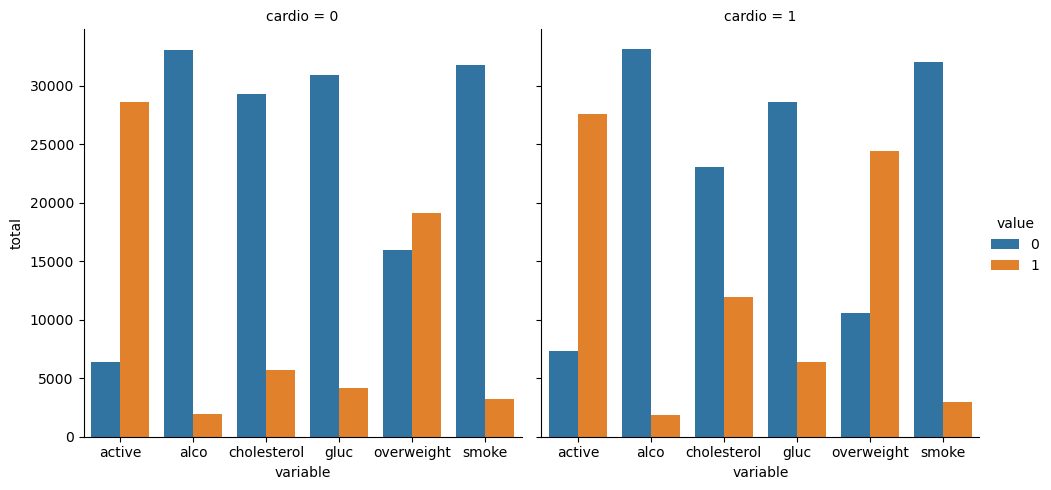

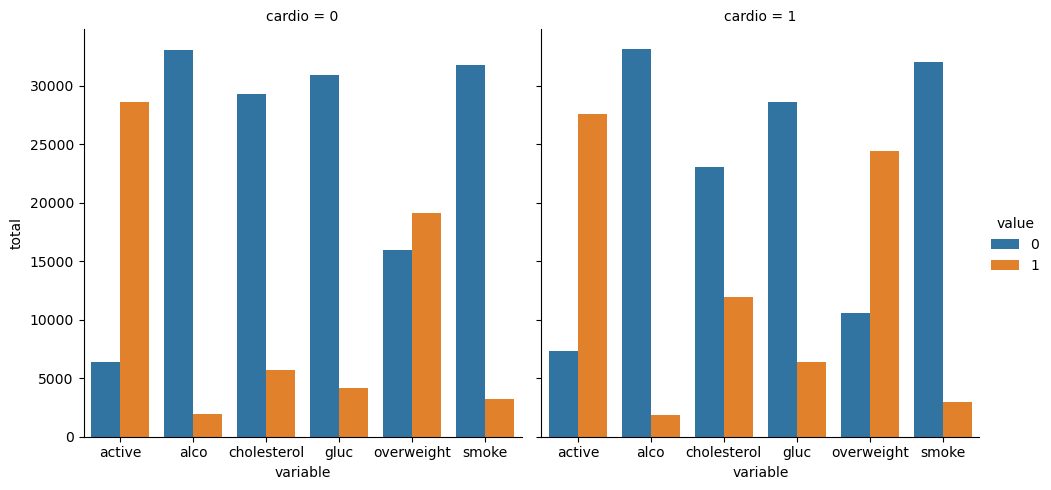

In [8]:
draw_cat_plot()

> #### Generating the heat map
> * Keep the rows ap_lo is less than or equal to ap_hi
> * Remove BMI from the table for this chart
> * Calculate the correlation matrix and round to one decimal place
> * Generate a masak for the upper triangle
> * Graph the function

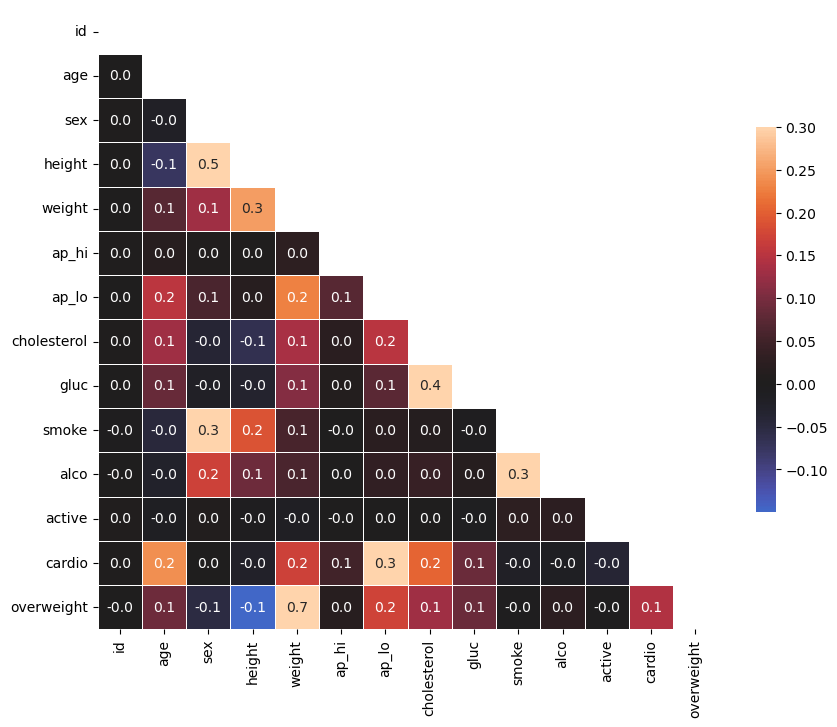

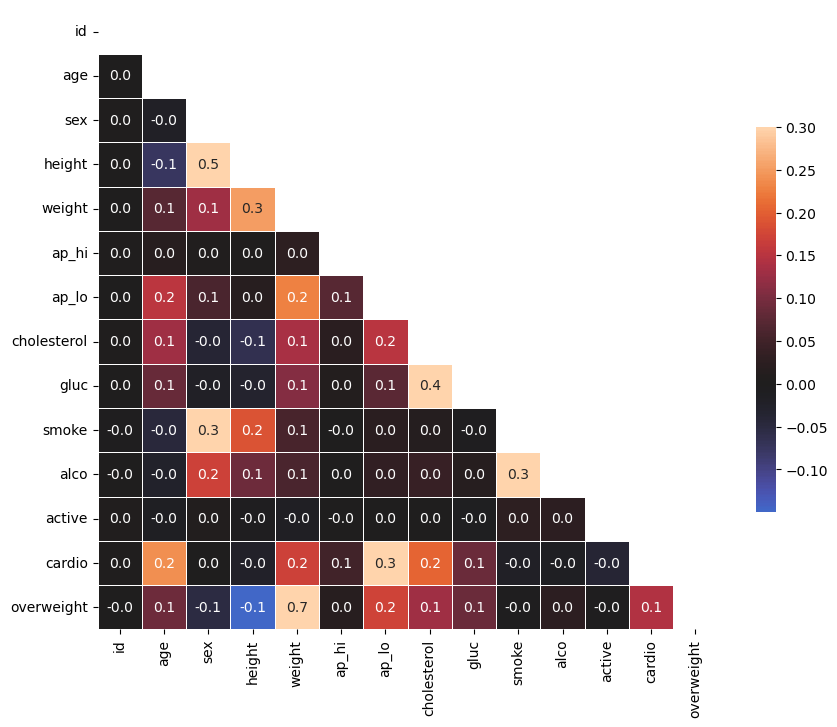

In [9]:
def draw_heat_map():

    # Filter out weight that is less than the 2.5th percentile
    df_heat = df.loc[(df["ap_lo"] <= df["ap_hi"]) & 
                     (df['weight'] >= df['weight'].quantile(0.025)) & 
                     (df['weight'] <= df['weight'].quantile(0.975)) & 
                     (df['height'] >= df['height'].quantile(0.025)) & 
                     (df['height'] <= df['height'].quantile(0.975))]
    # Filter out weight that is more than the 97.5th percentile
    # df_heat = df[df['weight'] <= df['weight'].quantile(0.975)]
    
    # Filter out height that is less than the 2.5th percentile
    # df_heat = df[df['height'] >= df['height'].quantile(0.025)]

    # Filter out height that is more than the 97.5th percentile
    # df_heat = df[df['height'] <= df['height'].quantile(0.975)]
    
    # Filter out diastolic pressuse that is higher than systolic
    # df_heat = df[df["ap_lo"] <= df["ap_hi"]]

    # Drop BMI from previous calculations
    if "BMI" in df_heat.columns:
        df_heat = df_heat.drop("BMI", axis=1)

    # Calculate the correlation matrix
    corr = df_heat.corr(method='pearson')


    # Round the correlation matrix to one decimal place
    #corr = corr.round(2)
    #print(corr)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(
        corr,
        mask=mask,
        cmap="icefire",
        vmax=0.3,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        annot=True,
        fmt=".1f",
    )
    # Do not modify the next two lines
    fig.savefig("heatmap.png")
    return fig

draw_heat_map()